In [158]:
import numpy as np
import math
x = np.random.multivariate_normal([2,2,2],
                                      [[1, 0,0],[0, 1, 0], [0, 0, 1]],(250,1))
y = np.random.multivariate_normal([9,10,8],
                                      [[2, 0,0],[0, 2, 0], [0, 0, 2]],(250,1))
z = np.random.multivariate_normal([10,21,16],
                                      [[2, 0,0],[0, 2, 0], [0, 0, 2]],(250,1))
w  = np.random.multivariate_normal([20,25,20],
                                      [[2, 0,0],[0, 2, 0], [0, 0, 2]],(250,1))
x = np.vstack((x,y,z,w))

In [159]:
nx=np.zeros([1000,1,4])
for i in range(1000):
    nx[i][0][0]=x[i][0][0]
    nx[i][0][1]=x[i][0][1]
    nx[i][0][2]=x[i][0][2]
    nx[i][0][3]=(i)//250+1

In [160]:
clusters = []
log=[]
for i in range(1000):
    clusters.append(nx[i])

In [161]:
clusterSingle(clusters[1],clusters[3])

2.7945233632681283

In [162]:
def DisMinkowski(x1, x2, t=2):
    dis = 0
    for i in range(3):
        dis = dis + math.pow(x1[i]-x2[i],t)
    return math.sqrt(dis)


In [163]:
def clusterSingle(clu1,clu2,t=2):

    Min = 10000000
    for i in range(len(clu1)):
        for j in range(len(clu2)):
            d=DisMinkowski(clu1[i],clu2[j],t)
            Min = d if d < Min else Min
    return Min

def clusterComplete(clu1,clu2,t=2):

    Max = -1000000
    for i in range(len(clu1)):
        for j in range(len(clu2)):
            d = DisMinkowski(clu1[i],clu2[j],t)
            Max = d if d > Max else Max
    return Max

def clusterAverage(clu1,clu2,p=2):
    d = 0
    for i in range(len(clu1)):
        for j in range(len(clu2)):
            d = d + DisMinkowski(clu1[i],clu2[j],p)
    ans = d/(len(clu1)*len(clu2))
    return ans


In [164]:
def disMat(sample,t=2):
    Mat = np.zeros((len(sample),len(sample)))
    for i in range(len(sample)):
        for j in range(len(sample)):            
            Mat[i][j] = DisMinkowski(sample[i][0],sample[j][0],t)
    return Mat
    

In [165]:
def ClusterDis(clus,func=2,p=0):
    templist = np.zeros((len(clus),len(clus)))
    if func == 0:
        for i in range(len(clus)):
            for j in range(len(clus)):
                templist[i][j]=clusterSingle(clus[i],clus[j])
        return templist
    if func == 1:
        for i in range(len(clus)):
            for j in range(len(clus)):
                templist[i][j]=clusterComplete(clus[i],clus[j])
        return templist
    if func == 2:
        for i in range(len(clus)):
            for j in range(len(clus)):
                templist[i][j]=clusterAverage(clus[i],clus[j])
        return templist


In [166]:
def Clustering(clusters,x,y):
    clusters[min(x,y)] = np.vstack((clusters[x],clusters[y]))
    log.append((x,y))
        #clusters=np.delete(clusters,-1,axis=0)
    del(clusters[max(x,y)])

In [168]:
for i in range(996):
    D = ClusterDis(clusters,2)
    D = D.reshape(1,np.size(D))
   
    a = np.argsort(D)[0][1000-i]//(1000-i)
    b = np.argsort(D)[0][1000-i]%(1000-i)
    Clustering(clusters,a,b)

In [151]:
log

[(11, 12),
 (0, 3),
 (5, 8),
 (4, 7),
 (4, 5),
 (4, 5),
 (7, 6),
 (8, 12),
 (11, 8),
 (6, 5),
 (1, 0),
 (7, 8),
 (1, 0),
 (4, 3),
 (1, 0),
 (3, 4)]

In [169]:
clusters[1]

array([[11.21140345,  7.68986022,  8.54771286,  2.        ],
       [11.72220767,  8.11998051,  9.04921197,  2.        ],
       [12.23790783,  9.14719386,  7.76904803,  2.        ],
       [12.15371105,  9.26800371,  4.97475526,  2.        ],
       [ 8.89336276, 10.80840692, 10.27771489,  2.        ],
       [ 8.73614726, 10.37023269, 10.34071379,  2.        ],
       [ 8.68493318, 10.65544493, 11.00404392,  2.        ],
       [ 9.66567823, 10.37635479, 10.52007262,  2.        ],
       [ 9.72893858, 10.15555959, 10.68959328,  2.        ],
       [ 9.97337022,  9.74502161, 10.5720449 ,  2.        ],
       [10.13484577, 12.06148911, 10.416551  ,  2.        ],
       [ 9.5730135 , 11.4083195 , 11.06842243,  2.        ],
       [10.02301472, 10.94186246, 10.77554008,  2.        ],
       [ 9.11234289, 11.69924395,  9.73184776,  2.        ],
       [ 8.85896582, 11.36108903,  9.75522371,  2.        ],
       [ 8.87704961, 11.53969993, 10.60218746,  2.        ],
       [ 9.0752559 , 12.

In [62]:
nx

array([[[ 1.55567108e+00,  1.52653715e+00,  1.46229089e+00,
          1.00000000e+00]],

       [[ 2.82432663e+00,  2.52384493e+00,  1.49424165e+00,
          1.00000000e+00]],

       [[ 1.93600918e+00,  2.84284497e+00,  1.32754674e+00,
          1.00000000e+00]],

       [[ 2.45002940e+00,  2.60485931e+00,  1.26335968e+00,
          1.00000000e+00]],

       [[ 3.02506560e+00,  3.34567678e+00,  2.49662205e+00,
          1.00000000e+00]],

       [[ 2.68426712e+00,  2.31624602e+00,  6.17196639e-01,
          1.00000000e+00]],

       [[ 1.46012144e+00,  2.19074176e+00,  2.11654891e+00,
          1.00000000e+00]],

       [[ 2.71510088e+00,  2.91513241e+00,  1.40478882e+00,
          1.00000000e+00]],

       [[ 2.78714941e+00,  7.19086781e-01,  2.72054208e+00,
          1.00000000e+00]],

       [[ 1.47140682e+00,  3.41139486e+00,  2.80516367e+00,
          1.00000000e+00]],

       [[ 1.23877919e+00,  2.82795889e+00,  1.22632657e+00,
          1.00000000e+00]],

       [[ 3.74475103e

In [137]:
ww=np.vstack((x[1],x[2]))

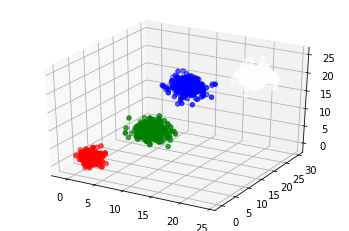

In [175]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1,y1,z1,c='r')
ax.scatter(x2,y2,z2,c='g')
ax.scatter(x3,y3,z3,c='b')
ax.scatter(x4,y4,z4,c='w')
plt.show()

In [206]:
li=[1,2,3,4,5,6,7,8,9,10]
print(len(li))
for i in range(5,len(li)-1):
    li[i]=li[i+1]

10


In [240]:
li=[1,2,3,4,5,6,7,8,9,10]

del(li[3])

In [241]:
print(li)
print(len(li))

[1, 2, 3, 5, 6, 7, 8, 9, 10]
9


In [174]:
x1=[]
y1=[]
z1=[]
for i in range(250):
    x1.append(clusters[0][i][0])
    y1.append(clusters[0][i][1])
    z1.append(clusters[0][i][2])
x2=[]
y2=[]
z2=[]
for i in range(250):
    x2.append(clusters[1][i][0])
    y2.append(clusters[1][i][1])
    z2.append(clusters[1][i][2])
x3=[]
y3=[]
z3=[]
for i in range(250):
    x3.append(clusters[2][i][0])
    y3.append(clusters[2][i][1])
    z3.append(clusters[2][i][2])
x4=[]
y4=[]
z4=[]
for i in range(250):
    x4.append(clusters[3][i][0])
    y4.append(clusters[3][i][1])
    z4.append(clusters[3][i][2])

In [38]:
for i in range(250):
    if(clusters[0][i][3]!=1):
        print('?')
for i in range(250):
    if(clusters[1][i][3]!=2):
        print('?')
for i in range(250):
    if(clusters[2][i][3]!=3):
        print('?')
for i in range(250):
    if(clusters[3][i][3]!=4):
        print('?')

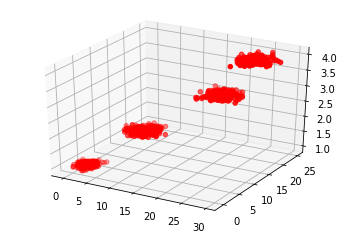

In [178]:
x0=[]
y0=[]
z0=[]
for i in range(1000):
    x0.append(nx[i][0][1])
    y0.append(nx[i][0][2])
    z0.append(nx[i][0][3])
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x0,y0,z0,c='r')

In [176]:
nx[1]

array([[2.84859808, 3.02067789, 2.15761845, 1.        ]])